In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                     
bitcoin                              6.57509                      7.67258   
ethereum                             4.80849                      0.13169   
tether                               0.00640                     -0.04237   
ripple                               2.24984                      0.23455   
bitcoin-cash                        14.75334                     15.74903   
binancecoin                          6.80688                      0.05865   
chainlink                            9.30098                    -11.21747   
cardano                              5.55476                     10.10553   
litecoin                             7.28931                      1.21662   
bitcoin-cash-sv                     -1.86656                      2.88926   

                 price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                      
bitcoin                             -3.25185                      83.51840   
ethereum                           -12.88890                     186.77418   
tether                               0.28037                      -0.00542   
ripple                             -17.55245                      39.53888   
bitcoin-cash                       -13.71793                      21.66042   
binancecoin                         36.33486                     155.61937   
chainlink                          -43.69522                     403.22917   
cardano                            -22.84776                     264.51418   
litecoin                           -17.23960                      27.49919   
bitcoin-cash-sv                    -24.87434                       7.42562   

                 price_change_percentage_1y  
coin_id                                      
bitcoin                            37.51761  
ethereum                          101.96023  
tether                              0.01954  
ripple                            -16.60193  
bitcoin-cash                       14.49384  
binancecoin                        69.69195  
chainlink                         325.13186  
cardano                           156.09756  
litecoin                          -12.66408  
bitcoin-cash-sv                    93.73082

In [3]:
# Generate summary statistics
df_market_data.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
import pandas as pd

# Load the data
file_path = "Resources/crypto_market_data.csv"
crypto_df = pd.read_csv(file_path)

# Display the first few rows
print(crypto_df.head())


        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   
1                    -12.88890      

In [6]:
from sklearn.preprocessing import StandardScaler

# Assuming you identified the correct 'coin_id' column name
coin_id_column = 'coin_id'  # Replace 'id' with the correct column name

# Drop the coin_id column if needed and select the features to encode/scale
features = crypto_df.drop(columns=[coin_id_column])

# Apply encoding (if necessary) and scaling
encoded_df = pd.get_dummies(features)

# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_df)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_features, columns=encoded_df.columns)

# Add the coin_id column back to the scaled DataFrame
scaled_df[coin_id_column] = crypto_df[coin_id_column]

# Set the coin_id column as the index
scaled_df.set_index(coin_id_column, inplace=True)

# Display the first few rows
scaled_df.head()


price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  
coin_id                                   
bitcoin                        -0.251637  
ethereum                       -0.199352  
tether                         -0.282061  
ripple                         -0.295546  
bitcoin-cash                   -0.270317

---

### Find the Best Value for k Using the Original Data.

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))




In [21]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [22]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

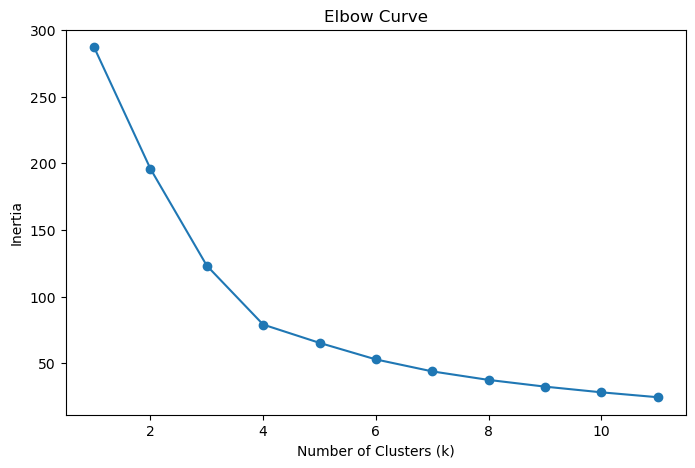

In [23]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [24]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Example value, adjust based on your elbow curve
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [25]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [26]:
# Predict the clusters to group the cryptocurrencies using the scaled data
scaled_df['cluster'] = kmeans.predict(scaled_df)

# Print the resulting array of cluster values.
print(scaled_df)

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684   
crypto-com-chain            

In [27]:
# Create a copy of the DataFrame


In [28]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [29]:
# Create a scatter plot using hvPlot by setting 
import hvplot.pandas

scatter_plot = scaled_df.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='cluster', 
    hover_cols=['coin_id'], 
    title='Cryptocurrency Clusters'
)
scatter_plot

# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [30]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [31]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(scaled_df.drop('cluster', axis=1))

# View the first five rows of the DataFrame. 

In [32]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance)
total_explained_variance

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%, meaning that 89.5% of the data was captured using the three princicpal components.

In [33]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)
pca_df.head()


PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715

---

### Find the Best Value for k Using the PCA Data

In [34]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [35]:
# Create an empty list to store the inertia values
pca_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df)
    pca_inertia_values.append(kmeans.inertia_)

# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [36]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": k_values, "inertia": pca_inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_data)

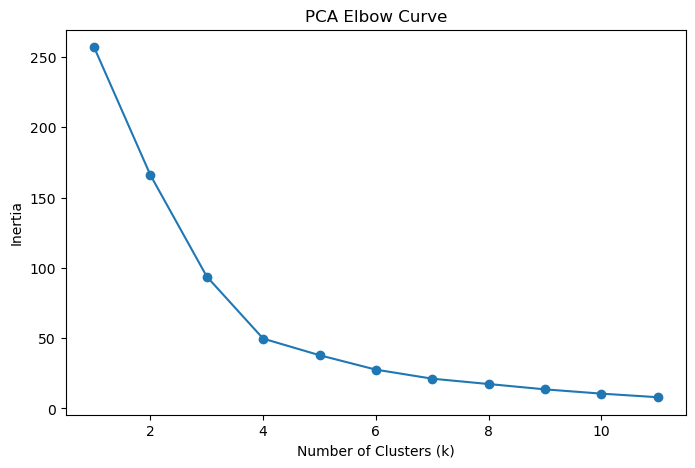

In [37]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 5))
plt.plot(pca_elbow_df['k'], pca_elbow_df['inertia'], marker='o')
plt.title('PCA Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [38]:
# Initialize the K-Means model using the best value for k
pca_best_k = 3  # Example value, adjust based on your elbow curve
kmeans_pca = KMeans(n_clusters=pca_best_k, random_state=0)



In [39]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [40]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_df['cluster'] = kmeans_pca.predict(pca_df)
# Print the resulting array of cluster values.
print(pca_df)

                           PC1       PC2       PC3  cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        0
ethereum             -0.458261  0.458466  0.952877        0
tether               -0.433070 -0.168126 -0.641752        0
ripple               -0.471835 -0.222660 -0.479053        0
bitcoin-cash         -1.157800  2.041209  1.859715        0
binancecoin          -0.516534  1.388377  0.804071        0
chainlink            -0.450711  0.517699  2.846143        0
cardano              -0.345600  0.729439  1.478013        0
litecoin             -0.649468  0.432165  0.600303        0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        0
crypto-com-chain     -0.248198 -1.376252 -1.462026        0
usd-coin             -0.438408 -0.175337 -0.663388        0
eos                  -0.693425 -0.473815 -0.527597        0
monero                0.060499  2.909404  1.498571        0
tron                 -0.393352 -0.108192

In [51]:
# Create a copy of the DataFrame with the PCA data
# Create a copy of the PCA DataFrame
pca_df_copy = pca_df.copy()

# Display the first few rows to verify the copy
print(pca_df_copy.head())


# Add a new column to the DataFrame with the predicted clusters
# Assuming `pca_clusters` contains the predicted cluster labels from K-Means
pca_df_copy['Predicted_Cluster'] = pca_clusters

# Display the first few rows to verify the new column
print(pca_df_copy.head())


# Display sample data


                   PC1       PC2       PC3  cluster  Cluster_PCA
coin_id                                                         
bitcoin      -0.600667  0.842760  0.461595        0            0
ethereum     -0.458261  0.458466  0.952877        0            0
tether       -0.433070 -0.168126 -0.641752        0            0
ripple       -0.471835 -0.222660 -0.479053        0            0
bitcoin-cash -1.157800  2.041209  1.859715        0            0
                   PC1       PC2       PC3  cluster  Cluster_PCA  \
coin_id                                                            
bitcoin      -0.600667  0.842760  0.461595        0            0   
ethereum     -0.458261  0.458466  0.952877        0            0   
tether       -0.433070 -0.168126 -0.641752        0            0   
ripple       -0.471835 -0.222660 -0.479053        0            0   
bitcoin-cash -1.157800  2.041209  1.859715        0            0   

              Predicted_Cluster  
coin_id                          


In [52]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = pca_df.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster', 
    hover_cols=['coin_id'], 
    title='Cryptocurrency Clusters with PCA'
)
scatter_plot_pca

:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

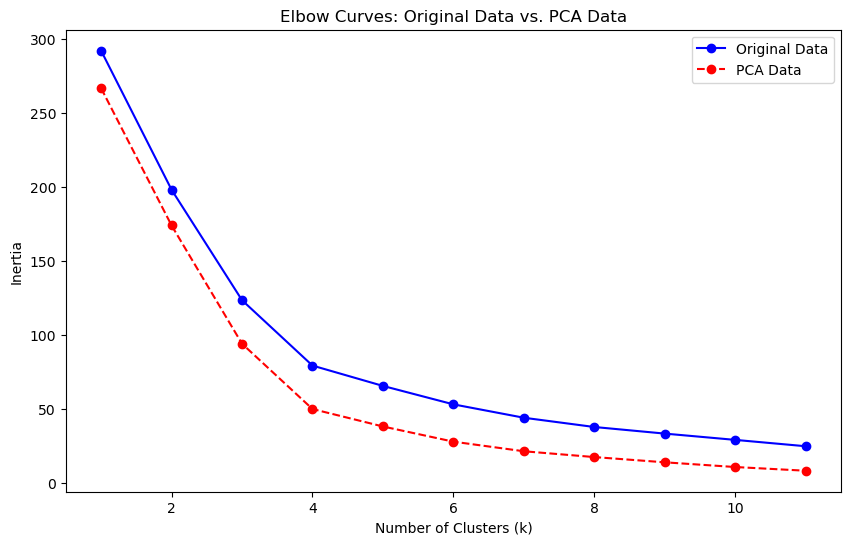

In [53]:
# Composite plot to contrast the Elbow curves
from sklearn.cluster import KMeans

# Define the range of k values to try
k_values = range(1, 12)

# Initialize a list to store inertia values
original_inertia_values = []

# Compute inertia for each k using the original scaled data
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df_copy)  # Fit the model to the scaled data
    original_inertia_values.append(kmeans.inertia_)  # Inertia is a scalar

# Initialize a list to store inertia values for PCA data
pca_inertia_values = []

# Assuming pca_df is your PCA-transformed DataFrame
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)  # Fit the model to the PCA-transformed data
    pca_inertia_values.append(kmeans.inertia_)  # Inertia is a scalar
import matplotlib.pyplot as plt

# Overlayed Elbow Curves
plt.figure(figsize=(10, 6))

# Plot the original data Elbow curve
plt.plot(k_values, original_inertia_values, marker='o', color='blue', label='Original Data')

# Plot the PCA data Elbow curve
plt.plot(k_values, pca_inertia_values, marker='o', color='red', linestyle='--', label='PCA Data')

# Add titles and labels
plt.title('Elbow Curves: Original Data vs. PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()

# Show the plot
plt.show()



C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nbmal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

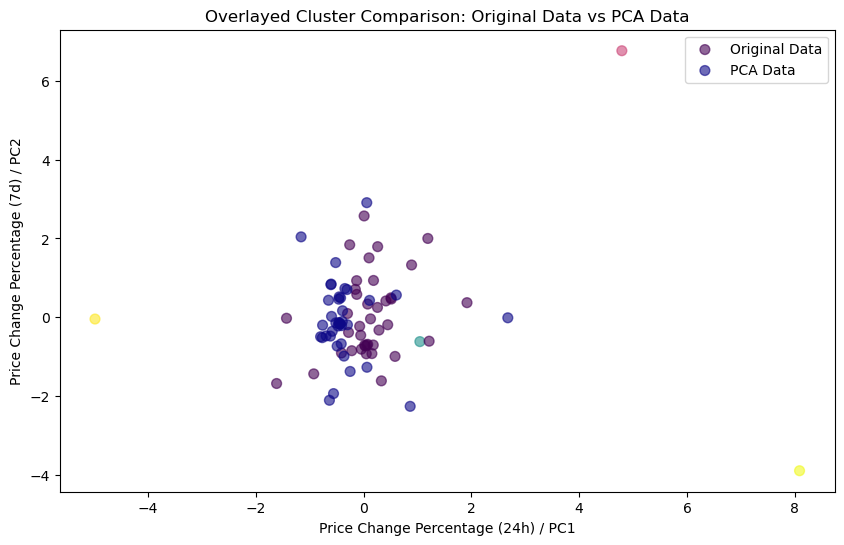

In [54]:
# Composite plot to contrast the clusters
# Predict clusters using the original scaled data
kmeans_original = KMeans(n_clusters=3, random_state=42)  # Replace 3 with the optimal k value
original_clusters = kmeans_original.fit_predict(scaled_df_copy)

# Add predicted clusters as a new column in the original scaled DataFrame
scaled_df_copy['Cluster_Original'] = original_clusters
# Predict clusters using the PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Replace 3 with the optimal k value
pca_clusters = kmeans_pca.fit_predict(pca_df)

# Add predicted clusters as a new column in the PCA DataFrame
pca_df['Cluster_PCA'] = pca_clusters
plt.figure(figsize=(10, 6))

# Plot clusters for Original Scaled Data
plt.scatter(scaled_df_copy['price_change_percentage_24h'], scaled_df_copy['price_change_percentage_7d'], 
            c=scaled_df_copy['Cluster_Original'], cmap='viridis', label='Original Data', alpha=0.6, s=50)

# Plot clusters for PCA Data
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_PCA'], cmap='plasma', label='PCA Data', alpha=0.6, s=50)

# Add labels and title
plt.title('Overlayed Cluster Comparison: Original Data vs PCA Data')
plt.xlabel('Price Change Percentage (24h) / PC1')
plt.ylabel('Price Change Percentage (7d) / PC2')
plt.legend()

# Show the plot
plt.show()

# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** By reducing the dimensionality of the original data we see a more precise cluster of data points in the PCA Data.